# Proceedings classification

### Setup

In [1]:
%run -i 'random_state.py'
from packages import *
from clean_functions import *
from tokenizer import *

# W2V/CNN/LSTM

### Getting data ready

Loading data

In [2]:
X, y=np.load('data/X_w2v.npy'),np.load('data/y_w2v.npy')


Y Distribution

In [3]:
print('H:Arquivado',np.sum(np.array(y)=='H:Arquivado'),np.mean(np.array(y)=='H:Arquivado'), '\n')
print('H:Ativo',np.sum(np.array(y)=='H:Ativo'),np.mean(np.array(y)=='H:Ativo'), '\n')
print('H:Suspenso',np.sum(np.array(y)=='H:Suspenso'),np.mean(np.array(y)=='H:Suspenso'), '\n')

H:Arquivado 3040 0.4713909133198946 

H:Ativo 2917 0.45231818886649094 

H:Suspenso 492 0.07629089781361452 



Latex table of Y distribution:

In [4]:
print("\\begin{table}[H] \n",
      "\centering \n",
      "\caption{Distribution of legal proceedings' labels} \n",
      ' \\begin{tabular}{c|c|c} \n',
      ' \\toprule \n',
      '        & \% & N\\\ \n',
      ' \midrule \n',
      ' Archived (class 1) &'+str(np.round(100*np.mean(np.array(y)=='H:Arquivado'),2))+'\%'+' & '+str(np.sum(np.array(y)=='H:Arquivado'))+'\\\ \n',
      ' Active (class 2) &'+str(np.round(100*np.mean(np.array(y)=='H:Ativo'),2))+'\%'+' & '+str(np.sum(np.array(y)=='H:Ativo'))+'\\\ \n',
      ' Suspended (class 3) &'+str(np.round(100*np.mean(np.array(y)=='H:Suspenso'),2))+'\%'+' & '+str(np.sum(np.array(y)=='H:Suspenso'))+'\\\ \n',
      ' \midrule \n',
      ' Total &'+str(100)+'\%'+' & '+str(len(y))+'\\\ \n',
      ' \\bottomrule \n',
      ' \end{tabular}% \n',
      '\label{tab:lab}% \n',
   '\end{table}% \n')

\begin{table}[H] 
 \centering 
 \caption{Distribution of legal proceedings' labels} 
  \begin{tabular}{c|c|c} 
  \toprule 
         & \% & N\\ 
  \midrule 
  Archived (class 1) &47.14\% & 3040\\ 
  Active (class 2) &45.23\% & 2917\\ 
  Suspended (class 3) &7.63\% & 492\\ 
  \midrule 
  Total &100\% & 6449\\ 
  \bottomrule 
  \end{tabular}% 
 \label{tab:lab}% 
 \end{table}% 



Turning y into numeric:

In [5]:
encode={'H:Arquivado': 1,'H:Ativo': 2,'H:Suspenso': 3}
decode={1:'H:Arquivado',2:'H:Ativo',3:'H:Suspenso'}
#
for i in range(len(y)):
    y[i]=encode[y[i]]

Splitting the dataset in train, test and validation set:

In [6]:
y=np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=2/3, random_state=random_seed)

y_train2=np.array(pd.get_dummies(y_train))
y_val2=np.array(pd.get_dummies(y_val))
y_test2=np.array(pd.get_dummies(y_test))

np.shape(X_train),np.shape(y_train)

((4514, 5, 70, 100), (4514,))

Counting number of example per set

In [7]:
n_train=len(y_train)
n_val=len(y_val)
n_test=len(y_test)
n=n_train+n_val+n_test

print("\\begin{table}[H] \n",
      "\centering \n",
      "\caption{Training, validation and test sets} \n",
      ' \\begin{tabular}{c|c|c} \n',
      ' \\toprule \n',
      '        & \% & N\\\ \n',
      ' \midrule \n',
      ' Training set &'+str(np.round(100*(n_train/n),2))+'\%'+' & '+str(n_train)+'\\\ \n',
      ' Validation set &'+str(np.round(100*(n_val/n),2))+'\%'+' & '+str(n_val)+'\\\ \n',
      ' Test set &'+str(np.round(100*(n_test/n),2))+'\%'+' & '+str(n_test)+'\\\ \n',
      ' \midrule \n',
      ' Total &'+str(100)+'\%'+' & '+str(len(y))+'\\\ \n',
      ' \\bottomrule \n',
      ' \end{tabular}% \n',
      '\label{tab:lab}% \n',
   '\end{table}% \n')    

\begin{table}[H] 
 \centering 
 \caption{Training, validation and test sets} 
  \begin{tabular}{c|c|c} 
  \toprule 
         & \% & N\\ 
  \midrule 
  Training set &70.0\% & 4514\\ 
  Validation set &10.0\% & 645\\ 
  Test set &20.0\% & 1290\\ 
  \midrule 
  Total &100\% & 6449\\ 
  \bottomrule 
  \end{tabular}% 
 \label{tab:lab}% 
 \end{table}% 



# Interpretability

In [8]:
model_cnn = tensorflow.keras.models.load_model('models/model_lstm_w2v.h5')
model_feat = tensorflow.keras.models.load_model('models/model_feat_lstm_w2v.h5')
model_classific = tensorflow.keras.models.load_model('models/model_classific_lstm_w2v.h5')

Loading W2V model

In [9]:
word = KeyedVectors.load("models/doc2vec_mov_100_10")
embed_dim=np.shape(word['juiz'])[0]
word_vectors = word.wv

### What are the filters looking for?

Grabbing filters weights:

In [10]:
w=model_cnn.layers[1].get_weights()
np.shape(w)

(1, 1, 100, 9)

In [11]:
k=w[-1].shape[-1]

Number of terms closest to the filters we're going to take from vocabulary:

In [12]:
n_w=3

Table:

In [13]:
for n in range(k):
    v=np.reshape(w[0][:,:,n],-1)

    print("%Filter",n+1,"\n")
    
    for i in word.wv.similar_by_vector(v,n_w):
         print(i[0].replace("_", " "),np.round(i[1],2))
    
    print("\n\n")

%Filter 1 

sobrestamento 0.41
ro mariana marujo 0.4
concede-se vistas fora 0.4



%Filter 2 

arquivado definitivamente 0.47
baixa definitiva 0.41
denominado grupo sifco 0.4



%Filter 3 

instituicao financeira demandada 0.4
nele constar 0.39
autora-executada 0.38



%Filter 4 

do 0.42
seus 0.41
conclusos 0.4



%Filter 5 

diferenciados 0.4
quinta turma 0.4
tersio 0.37



%Filter 6 

arquivado definitivamente 0.48
baixa definitiva 0.46
baixa 0.43



%Filter 7 

arquivado definitivamente 0.66
arquivado provisoriamente 0.52
baixa definitiva 0.51



%Filter 8 

incidente 0.46
coligir 0.42
contracheque 0.41



%Filter 9 

oliveira 0.4
ficara isenta 0.37
forma automatica 0.35





Latex table:

In [14]:
print('\\begin{table}[H] \n',
      '\centering \n',
      '\\begin{threeparttable} \n',
      '\caption{Similarity between most similar tokens and filters} \n',
        '\\begin{tabular}{c|c|c} \n',
        '\\toprule \n',
     '\multicolumn{1}{c|}{} & \multicolumn{1}{c|}{Tokens} & \multicolumn{1}{c}{Cosine similarity}\\\\ \n')

for n in range(k):
    print('\midrule')
    v=np.reshape(w[0][:,:,n],-1)
    print('\multicolumn{1}{c|}{\multirow{'+str(n_w)+'}[2]{*}{Filter '+str(n+1)+'}} &'+ "\ textit{".replace(" ", "")+word.wv.similar_by_vector(v,n_w)[0][0].replace("_", " ")+'} &'+ str(np.round(word.wv.similar_by_vector(v,n_w)[0][1],2)) +' \\\\')
    for j in range(n_w-1):
        print('\multicolumn{1}{c|}{} &'+ "\ textit{".replace(" ", "")+word.wv.similar_by_vector(v,n_w)[j+1][0].replace("_", " ")+'} &'+str(np.round(word.wv.similar_by_vector(v,n_w)[j+1][1],2))+' \\\\')


print('\n \\bottomrule \n',
        '\end{tabular} \n',
      '\label{tab:simil} \n',
     '\end{threeparttable} \n',
    '\end{table} \n')

\begin{table}[H] 
 \centering 
 \begin{threeparttable} 
 \caption{Similarity between most similar tokens and filters} 
 \begin{tabular}{c|c|c} 
 \toprule 
 \multicolumn{1}{c|}{} & \multicolumn{1}{c|}{Tokens} & \multicolumn{1}{c}{Cosine similarity}\\ 

\midrule
\multicolumn{1}{c|}{\multirow{3}[2]{*}{Filter 1}} &\textit{sobrestamento} &0.41 \\
\multicolumn{1}{c|}{} &\textit{ro mariana marujo} &0.4 \\
\multicolumn{1}{c|}{} &\textit{concede-se vistas fora} &0.4 \\
\midrule
\multicolumn{1}{c|}{\multirow{3}[2]{*}{Filter 2}} &\textit{arquivado definitivamente} &0.47 \\
\multicolumn{1}{c|}{} &\textit{baixa definitiva} &0.41 \\
\multicolumn{1}{c|}{} &\textit{denominado grupo sifco} &0.4 \\
\midrule
\multicolumn{1}{c|}{\multirow{3}[2]{*}{Filter 3}} &\textit{instituicao financeira demandada} &0.4 \\
\multicolumn{1}{c|}{} &\textit{nele constar} &0.39 \\
\multicolumn{1}{c|}{} &\textit{autora-executada} &0.38 \\
\midrule
\multicolumn{1}{c|}{\multirow{3}[2]{*}{Filter 4}} &\textit{do} &0.42 \\
\multic

### How do features extracted by each filter relate to classification?

X-axis range

In [15]:
rang=np.arange(0, .65, 0.01).tolist()

Extracting CNN features

In [16]:
X_test_feat=model_feat.predict(X_test)

np.shape(X_test_feat)

(1290, 5, 9)

Calculating partial dependence functions

In [17]:
%%time

kernels=list(range(k))
times=[0,1,2,3,4]

ice={}

for kernel in kernels:
    
    ice2={}
    
    for t in times:
        
        probs=[]
        
        for i in rang:
            X_cf = copy.deepcopy(X_test_feat)
            X_cf[:, t, kernel]=i
            probs.append(model_classific.predict(X_cf).tolist())
            
        ice2[t]=np.array(probs)
            
    ice[kernel]=ice2

CPU times: user 5min 59s, sys: 50.2 s, total: 6min 49s
Wall time: 3min 39s


Centering the functions on zero

In [18]:
for kernel in kernels:
    for t in times: 
        ice[kernel][t]-=ice[kernel][t][0,:]

Calculating the average and stds

In [19]:
std={}
pdp={}

for kernel in kernels:
    std[kernel]={}
    pdp[kernel]={}
    
    for t in times: 
        std[kernel][t] = np.std(ice[kernel][t], axis=1)
        pdp[kernel][t] = np.mean(ice[kernel][t], axis=1)

Function that plot the functions

In [20]:
def pdp_plot2(kernel, target, legend=True, title=True, xaxis=True, yaxis=True, ytick=True, xtick=True, legend2=1):
    
    if xtick: xtick_size=16
    else: xtick_size=0
        
    if ytick: ytick_size=16
    else: ytick_size=0
        
    plt.plot(rang,pdp[kernel][0][:,target-1],'y:', linewidth=3,label='t = -5')
    plt.xticks(fontsize=xtick_size)
    plt.yticks(np.linspace(-.4,.4,5), fontsize=ytick_size)
    plt.plot(X_test_feat[:,0,kernel], [-.71+.215]*np.shape(X_test_feat)[0], '|', color='y', markersize=18)
    #er=std[kernel][0][:,target-1] #/np.sqrt(np.shape(X_test_feat)[0])
    #plt.fill_between(rang, pdp[kernel][0][:,target-1]+er, pdp[kernel][0][:,target-1]-er, facecolor='yellow', alpha=.1)

    plt.plot(rang,pdp[kernel][1][:,target-1],'c--', linewidth=2,label='t = -4')
    plt.xticks(fontsize=xtick_size)
    plt.yticks(fontsize=ytick_size)
    plt.plot(X_test_feat[:,1,kernel], [-.73+.215]*np.shape(X_test_feat)[0], '|', color='c',  markersize=15)
    #er=std[kernel][1][:,target-1] #/np.sqrt(np.shape(X_test_feat)[0])
    #plt.fill_between(rang, pdp[kernel][1][:,target-1]+er, pdp[kernel][1][:,target-1]-er, facecolor='cyan', alpha=.1)

    plt.plot(rang,pdp[kernel][2][:,target-1],'g-.', linewidth=2,label='t = -3')
    plt.xticks(fontsize=xtick_size)
    plt.yticks(fontsize=ytick_size)
    plt.plot(X_test_feat[:,2,kernel], [-.75+.215]*np.shape(X_test_feat)[0], '|', color='g', markersize=12)
    #er=std[kernel][2][:,target-1] #/np.sqrt(np.shape(X_test_feat)[0])
    #plt.fill_between(rang, pdp[kernel][2][:,target-1]+er, pdp[kernel][2][:,target-1]-er, facecolor='green', alpha=.1)

    plt.plot(rang,pdp[kernel][3][:,target-1],'b--', linewidth=2,label='t = -2')
    plt.xticks(fontsize=xtick_size)
    plt.yticks(fontsize=ytick_size)
    plt.plot(X_test_feat[:,3,kernel], [-.77+.215]*np.shape(X_test_feat)[0], '|', color='b', markersize=9)
    #er=std[kernel][3][:,target-1] #/np.sqrt(np.shape(X_test_feat)[0])
    #plt.fill_between(rang, pdp[kernel][3][:,target-1]+er, pdp[kernel][3][:,target-1]-er, facecolor='blue', alpha=.1)

    plt.plot(rang,pdp[kernel][4][:,target-1],'k', linewidth=2,label='t = -1')
    plt.xticks(fontsize=xtick_size)
    plt.yticks(fontsize=ytick_size)
    plt.plot(X_test_feat[:,4,kernel], [-.79+.215]*np.shape(X_test_feat)[0], '|', color='k',  markersize=5)
    #er=std[kernel][4][:,target-1] #/np.sqrt(np.shape(X_test_feat)[0])
    #plt.fill_between(rang, pdp[kernel][4][:,target-1]+er, pdp[kernel][4][:,target-1]-er, facecolor='black', alpha=.1)

    plt.ylim((-.6, .55))
    plt.xlim((-.075, .675))

    
    if legend: plt.gca().legend(loc='center left', bbox_to_anchor=(legend2, 0.5), fontsize=20)
    if title:  plt.title('Filter '+str(kernel+1)+"\n", fontsize=21)
    if yaxis: plt.ylabel('Class '+ str(target)+"\n\n\n ", fontsize=21)
    if xaxis: plt.xlabel('\n Features extracted by filters (cosine similarity)', fontsize=21, labelpad=8)
    

Plot for the paper

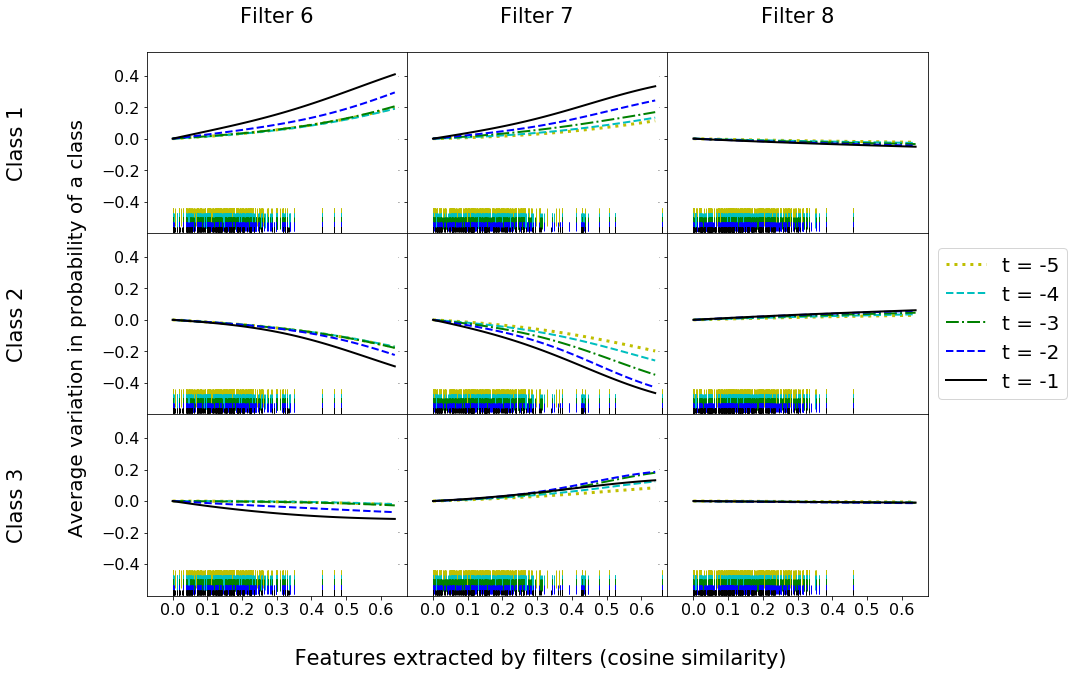

In [21]:
plt.figure(figsize=(14,10))
title=True
xaxis=False
xtick=False
legend=False
cont=0

for target in [1,2,3]: #kernels
    
    if cont>0: title=False
    #if cont==2: xaxis=True
    if cont==2: xtick=True
    
    plt.subplot(3, 3, 1+3*cont)
    #target=1
    kernel=6-1
    pdp_plot2(kernel,target,legend=legend, title=title, xaxis=xaxis, yaxis=True, xtick=xtick, ytick=True)
    
    
    if cont==2: xaxis=True
    plt.subplot(3, 3, 2+3*cont)
    #target=2
    kernel=7-1
    pdp_plot2(kernel,target,legend=legend, title=title, xaxis=xaxis, yaxis=False, xtick=xtick, ytick=False)
    xaxis=False
    
    if cont==1: legend=True
    plt.subplot(3, 3, 3+3*cont)
    #target=3
    kernel=8-1
    pdp_plot2(kernel,target,legend=legend, title=title, xaxis=xaxis, yaxis=False, xtick=xtick, ytick=False)

    legend=False
    
    
    cont+=1
 

plt.subplots_adjust(hspace=.0, wspace=.0)
plt.text(-1.8, 1.1, 'Average variation in probability of a class', va='center', rotation='vertical', size=20)

plt.savefig("plots/pdp_kernel.png", dpi=500,  bbox_inches='tight')

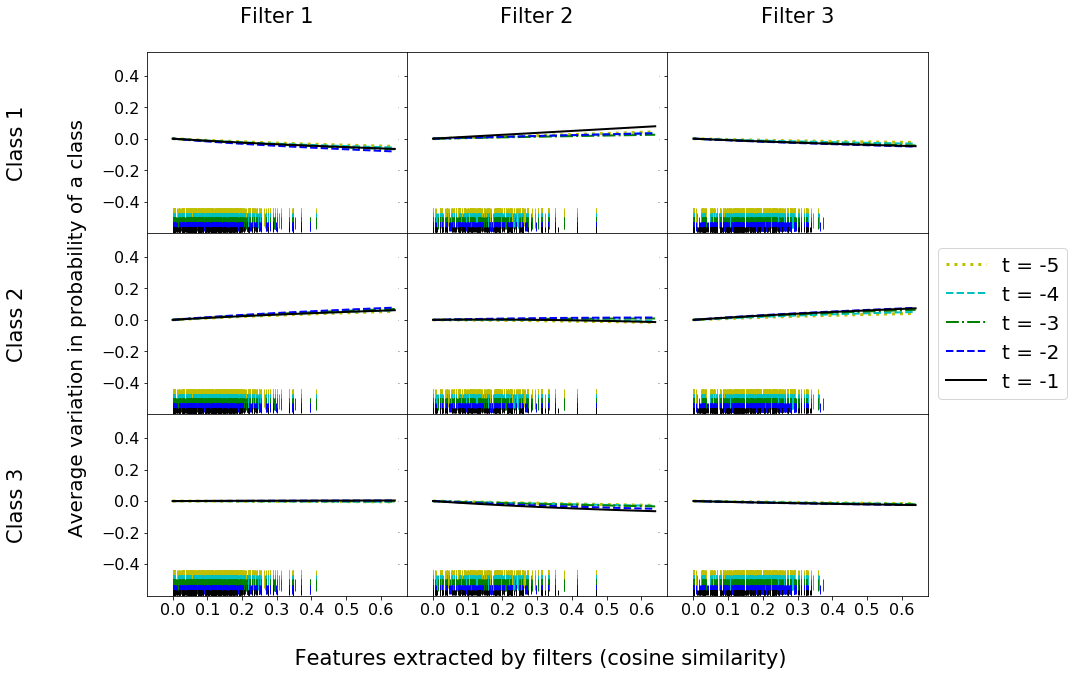

In [22]:
plt.figure(figsize=(14,10))
title=True
xaxis=False
xtick=False
legend=False
cont=0

for target in [1,2,3]: #kernels
    
    if cont>0: title=False
    #if cont==2: xaxis=True
    if cont==2: xtick=True
    
    plt.subplot(3, 3, 1+3*cont)
    #target=1
    kernel=1-1
    pdp_plot2(kernel,target,legend=legend, title=title, xaxis=xaxis, yaxis=True, xtick=xtick, ytick=True)
    
    
    if cont==2: xaxis=True
    plt.subplot(3, 3, 2+3*cont)
    #target=2
    kernel=2-1
    pdp_plot2(kernel,target,legend=legend, title=title, xaxis=xaxis, yaxis=False, xtick=xtick, ytick=False)
    xaxis=False
    
    if cont==1: legend=True
    plt.subplot(3, 3, 3+3*cont)
    #target=3
    kernel=3-1
    pdp_plot2(kernel,target,legend=legend, title=title, xaxis=xaxis, yaxis=False, xtick=xtick, ytick=False)

    legend=False
    
    
    cont+=1
 

plt.subplots_adjust(hspace=.0, wspace=.0)
plt.text(-1.8, 1.1, 'Average variation in probability of a class', va='center', rotation='vertical', size=20)

plt.savefig("plots/pdp_kernel0.png", dpi=500,  bbox_inches='tight')

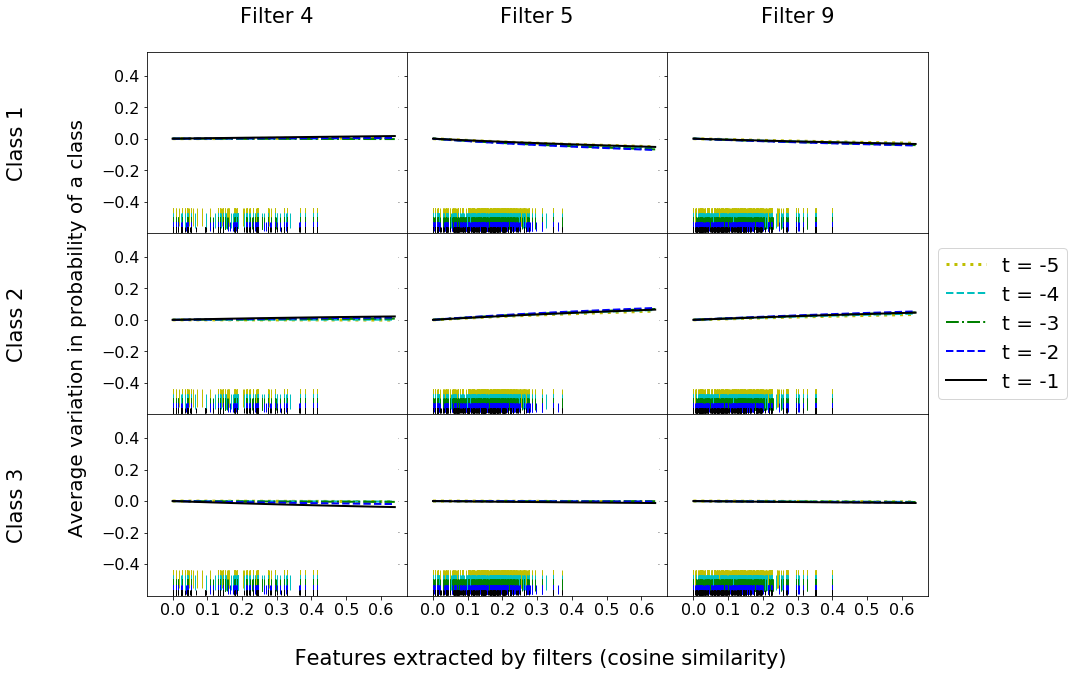

In [23]:
plt.figure(figsize=(14,10))
title=True
xaxis=False
xtick=False
legend=False
cont=0

for target in [1,2,3]: #kernels
    
    if cont>0: title=False
    #if cont==2: xaxis=True
    if cont==2: xtick=True
    
    plt.subplot(3, 3, 1+3*cont)
    #target=1
    kernel=4-1
    pdp_plot2(kernel,target,legend=legend, title=title, xaxis=xaxis, yaxis=True, xtick=xtick, ytick=True)
    
    
    if cont==2: xaxis=True
    plt.subplot(3, 3, 2+3*cont)
    #target=2
    kernel=5-1
    pdp_plot2(kernel,target,legend=legend, title=title, xaxis=xaxis, yaxis=False, xtick=xtick, ytick=False)
    xaxis=False
    
    if cont==1: legend=True
    plt.subplot(3, 3, 3+3*cont)
    #target=3
    kernel=9-1
    pdp_plot2(kernel,target,legend=legend, title=title, xaxis=xaxis, yaxis=False, xtick=xtick, ytick=False)

    legend=False
    
    
    cont+=1
 

plt.subplots_adjust(hspace=.0, wspace=.0)
plt.text(-1.8, 1.1, 'Average variation in probability of a class', va='center', rotation='vertical', size=20)

plt.savefig("plots/pdp_kernel1.png", dpi=500,  bbox_inches='tight')